<!-- <img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br> -->

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '401106096'
Name = 'Radin'
Last_Name = 'Shahdaei'

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.linspace(range_start, range_end, num_samples)

    y = (0.2 * X**6 - 0.5 * X**5 +
         2 * X**4 - 5 * X**3 +
         3 * X**2 - 10 * X +
         5)

    noise = np.random.normal(0, noise_std, size=y.shape)
    y += noise

    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

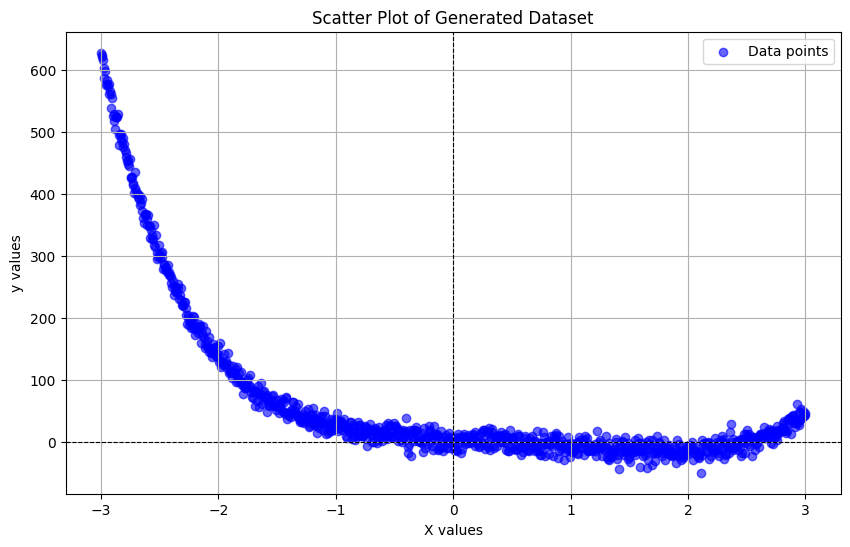

In [4]:
X, y = generate_dataset(-3, 3)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', marker='o', label='Data points')
plt.title('Scatter Plot of Generated Dataset')
plt.xlabel('X values')
plt.ylabel('y values')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid()
plt.legend()
plt.show()


## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
X_test_or, y_test_or = generate_dataset(5, 7, 200)

X_train, X_test_ir, y_train, y_test_ir = train_test_split(X, y, test_size=0.2, random_state=42)

print("In range test set size: \t", len(X_test_ir))
print("Out of range test set size: \t", len(X_test_or))

In range test set size: 	 200
Out of range test set size: 	 200


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

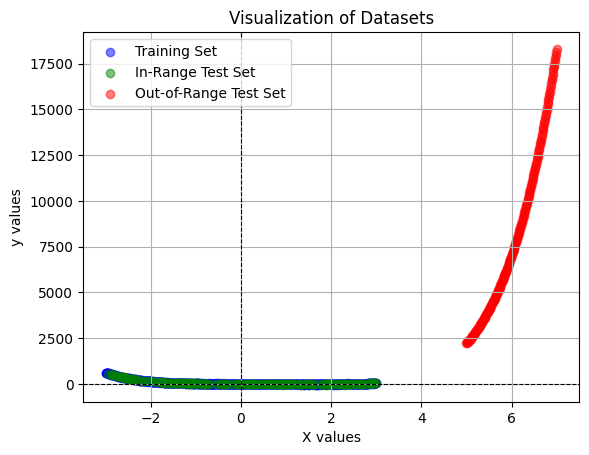

In [6]:
plt.scatter(X_train, y_train, alpha=0.5, color='blue', label='Training Set')

plt.scatter(X_test_ir, y_test_ir, alpha=0.5, color='green', label='In-Range Test Set')

plt.scatter(X_test_or, y_test_or, alpha=0.5, color='red', label='Out-of-Range Test Set')

plt.title('Visualization of Datasets')
plt.xlabel('X values')
plt.ylabel('y values')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid()
plt.legend()
plt.show()


## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
def train_models(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    return model

In [8]:
models = {}
degrees = range(2, 10)

for degree in degrees:
    models[degree] = train_models(X_train, y_train, degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    losses = {}

    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse

    return losses

In [10]:
train_losses = evaluate_models(models, X_train, y_train)
test_losses_ir = evaluate_models(models, X_test_ir, y_test_ir)
test_losses_or = evaluate_models(models, X_test_or, y_test_or)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

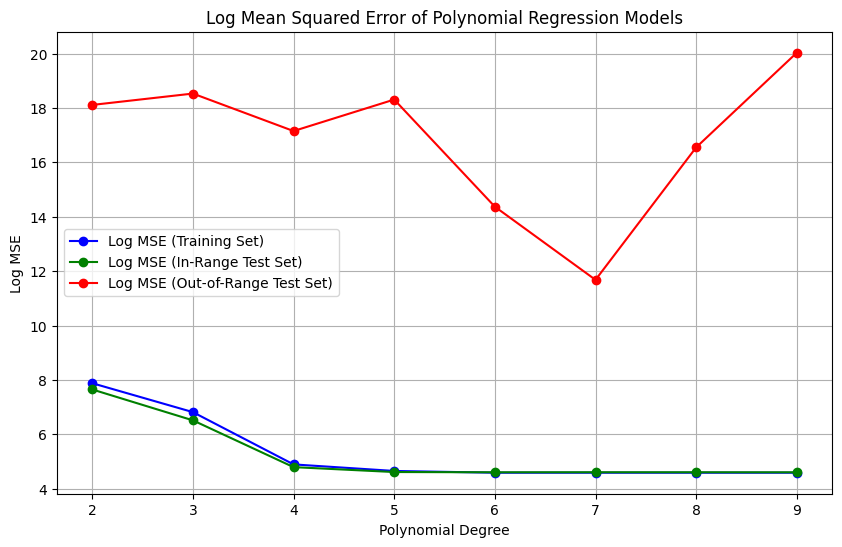

In [11]:
log_losses = {
    'train': {},
    'test_ir': {},
    'test_or': {}
}

for degree in range(2, 10):
    log_losses['train'][degree] = np.log(train_losses[degree])
    log_losses['test_ir'][degree] = np.log(test_losses_ir[degree])
    log_losses['test_or'][degree] = np.log(test_losses_or[degree])

degrees = range(2, 10)
train_log_losses = [log_losses['train'][degree] for degree in degrees]
test_ir_log_losses = [log_losses['test_ir'][degree] for degree in degrees]
test_or_log_losses = [log_losses['test_or'][degree] for degree in degrees]

plt.figure(figsize=(10, 6))

plt.plot(degrees, train_log_losses, marker='o', label='Log MSE (Training Set)', color='blue')
plt.plot(degrees, test_ir_log_losses, marker='o', label='Log MSE (In-Range Test Set)', color='green')
plt.plot(degrees, test_or_log_losses, marker='o', label='Log MSE (Out-of-Range Test Set)', color='red')

plt.title('Log Mean Squared Error of Polynomial Regression Models')
plt.xlabel('Polynomial Degree')
plt.ylabel('Log MSE')
plt.xticks(degrees)
plt.grid()
plt.legend()
plt.show()


In [12]:
print("Training Set Losses:")
for degree, mse in train_losses.items():
    print(f"Degree {degree}: MSE = {mse}")

print("\nIn-Range Test Set Losses:")
for degree, mse in test_losses_ir.items():
    print(f"Degree {degree}: MSE = {mse}")

print("\nOut-of-Range Test Set Losses:")
for degree, mse in test_losses_or.items():
    print(f"Degree {degree}: MSE = {mse}")

Training Set Losses:
Degree 2: MSE = 2641.0351333615527
Degree 3: MSE = 912.067298815809
Degree 4: MSE = 133.44629140568696
Degree 5: MSE = 104.8572375757603
Degree 6: MSE = 98.29077809815271
Degree 7: MSE = 98.28494090034908
Degree 8: MSE = 98.28054245912881
Degree 9: MSE = 98.26706608158467

In-Range Test Set Losses:
Degree 2: MSE = 2098.4383126599555
Degree 3: MSE = 673.9984145236438
Degree 4: MSE = 120.68732659957757
Degree 5: MSE = 100.784359793331
Degree 6: MSE = 99.87819973218075
Degree 7: MSE = 100.00432408898614
Degree 8: MSE = 99.94821462200707
Degree 9: MSE = 99.8099132425155

Out-of-Range Test Set Losses:
Degree 2: MSE = 73384268.77921644
Degree 3: MSE = 111435376.92078978
Degree 4: MSE = 28091052.76104848
Degree 5: MSE = 89410308.3827097
Degree 6: MSE = 1740522.7090181028
Degree 7: MSE = 118127.92804640964
Degree 8: MSE = 15396484.860962445
Degree 9: MSE = 500330815.3977955


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** Write your answer here</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** Write your answer here</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [13]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Get a brief description and do some EDA to get familiar with the dataset

------------------------------ INFO ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

------------------------------ DESCRIBE ------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000

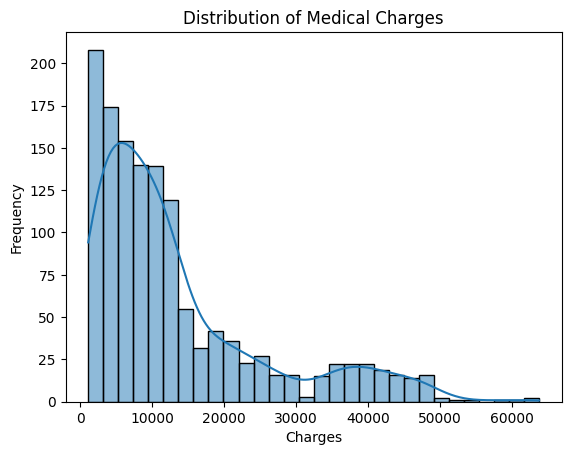

In [14]:
import seaborn as sns


print("-" * 30, "INFO", "-" * 30)
print(df.info())

print()

print("-" * 30, "DESCRIBE", "-" * 30)
print(df.describe())

print()

sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Preprocessing

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [35]:
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = df.drop('charges', axis=1)
y = df['charges']

X_processed = preprocessor.fit_transform(X)

num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([num_features, cat_features])

X_processed_df = pd.DataFrame(X_processed, columns=all_features)
print(X_processed_df.head())


        age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0 -1.438764 -0.453320 -0.908614         1.0       0.0        0.0         1.0   
1 -1.509965  0.509621 -0.078767         0.0       1.0        1.0         0.0   
2 -0.797954  0.383307  1.580926         0.0       1.0        1.0         0.0   
3 -0.441948 -1.305531 -0.908614         0.0       1.0        1.0         0.0   
4 -0.513149 -0.292556 -0.908614         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0  


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1070
Testing set size: 268


# Training

Fit a linear regressor to the data.

In [37]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [38]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

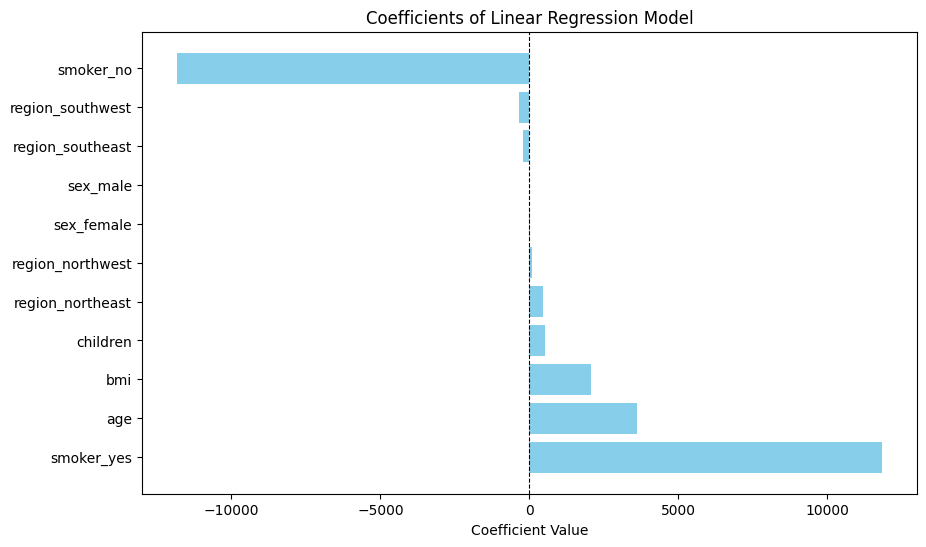

In [39]:
coefficients = linear_regressor.coef_
feature_names = X_processed_df.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


In [40]:
y_pred_linear = linear_regressor.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error: {mse_linear:.2f}")
print(f"Linear Regression R² Score: {r2_linear:.2f}")

Linear Regression Mean Squared Error: 33596915.85
Linear Regression R² Score: 0.78


# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

Lasso Regression Mean Squared Error: 33596944.04
Lasso Regression R² Score: 0.78


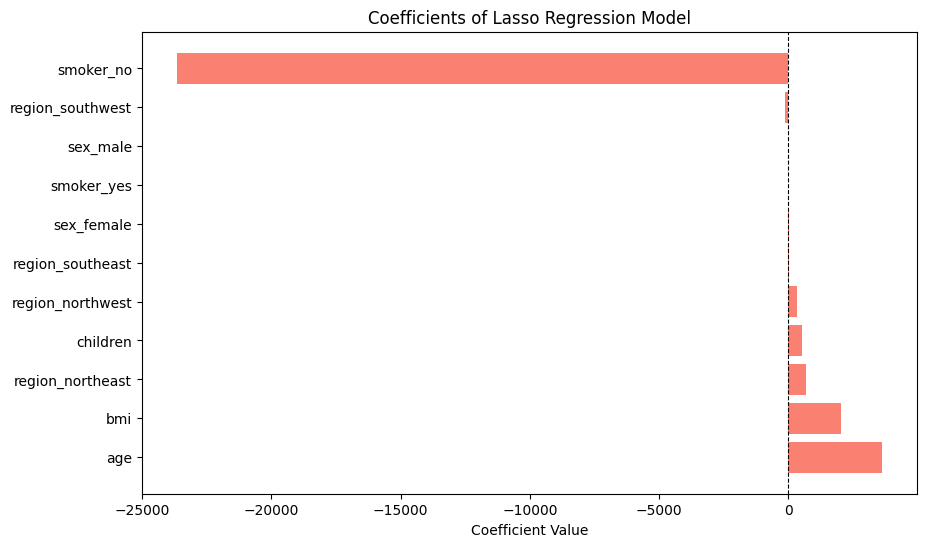

In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_regressor = Lasso(alpha=0.01)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Mean Squared Error: {mse_lasso:.2f}")
print(f"Lasso Regression R² Score: {r2_lasso:.2f}")

lasso_coefficients = lasso_regressor.coef_

lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})
lasso_coef_df = lasso_coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lasso_coef_df['Feature'], lasso_coef_df['Coefficient'], color='salmon')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Lasso Regression Model')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

Ridge Regression Mean Squared Error: 33597142.31
Ridge Regression R² Score: 0.78


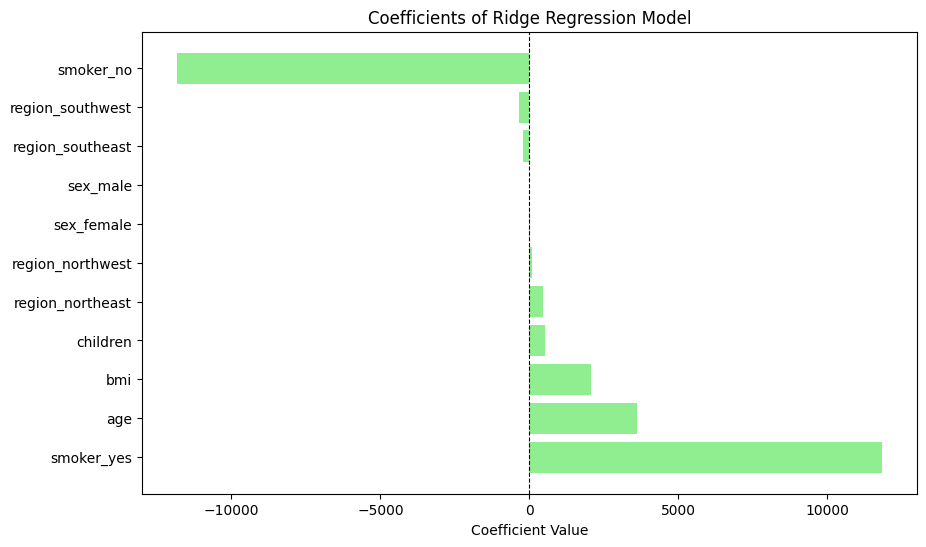

In [42]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=0.01)
ridge_regressor.fit(X_train, y_train)

y_pred_ridge = ridge_regressor.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression R² Score: {r2_ridge:.2f}")

ridge_coefficients = ridge_regressor.coef_

ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coefficients})
ridge_coef_df = ridge_coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ridge_coef_df['Feature'], ridge_coef_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Ridge Regression Model')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

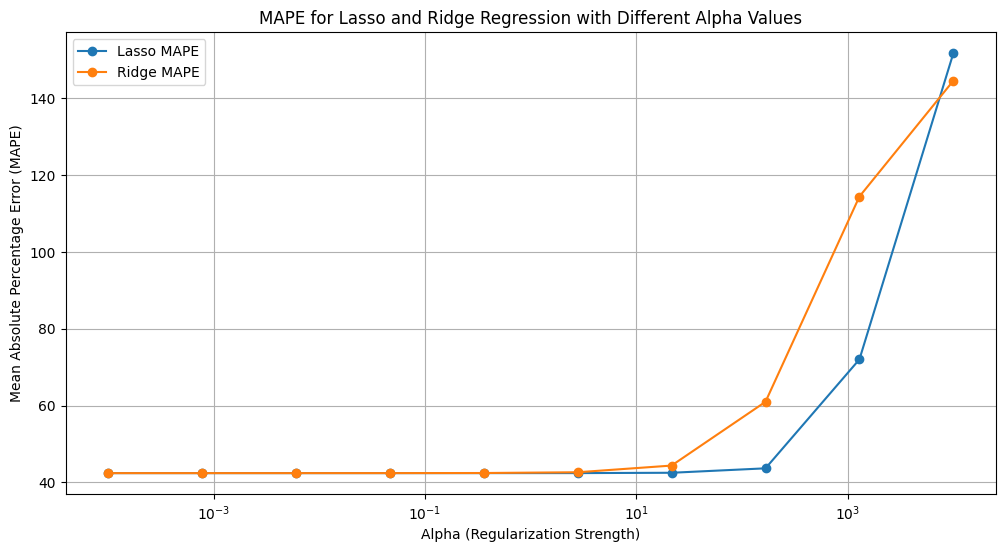

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import make_scorer
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

alphas = np.logspace(-4, 4, 10)

lasso_mape_results = []
ridge_mape_results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    mape_scores = cross_val_score(lasso, X_processed_df, y, cv=5, scoring=mape_scorer)
    lasso_mape_results.append(-np.mean(mape_scores))

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mape_scores = cross_val_score(ridge, X_processed_df, y, cv=5, scoring=mape_scorer)
    ridge_mape_results.append(-np.mean(mape_scores))

plt.figure(figsize=(12, 6))
plt.plot(alphas, lasso_mape_results, label='Lasso MAPE', marker='o')
plt.plot(alphas, ridge_mape_results, label='Ridge MAPE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('MAPE for Lasso and Ridge Regression with Different Alpha Values')
plt.legend()
plt.grid()
plt.show()

best_alpha_lasso = alphas[np.argmin(lasso_mape_results)]
best_alpha_ridge = alphas[np.argmin(ridge_mape_results)]

best_lasso = Lasso(alpha=best_alpha_lasso).fit(X_train, y_train)
best_ridge = Ridge(alpha=best_alpha_ridge).fit(X_train, y_train)

y_pred_lasso_best = best_lasso.predict(X_test)
y_pred_ridge_best = best_ridge.predict(X_test)

In [44]:
mape_lasso_best = mean_absolute_percentage_error(y_test, y_pred_lasso_best)
mape_ridge_best = mean_absolute_percentage_error(y_test, y_pred_ridge_best)

print(f"Lasso Regression MAPE: {mape_lasso_best:.2f}%")
print(f"Ridge Regression MAPE: {mape_ridge_best:.2f}%")

Lasso Regression MAPE: 46.89%
Ridge Regression MAPE: 46.89%


Add extra variables to dataset to make model more complex, then compare the results.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly.fit_transform(X_processed_df)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lasso_poly = Lasso(alpha=0.006)
ridge_poly = Ridge(alpha=0.0001)

lasso_poly.fit(X_train_poly, y_train)
ridge_poly.fit(X_train_poly, y_train)

y_pred_lasso_poly = lasso_poly.predict(X_test_poly)
y_pred_ridge_poly = ridge_poly.predict(X_test_poly)

mape_lasso_poly = mean_absolute_percentage_error(y_test, y_pred_lasso_poly)
mape_ridge_poly = mean_absolute_percentage_error(y_test, y_pred_ridge_poly)

print(f"Lasso Regression with Polynomial Features MAPE: {mape_lasso_poly:.2f}%")
print(f"Ridge Regression with Polynomial Features MAPE: {mape_ridge_poly:.2f}%")

Lasso Regression with Polynomial Features MAPE: 30.20%
Ridge Regression with Polynomial Features MAPE: 30.20%


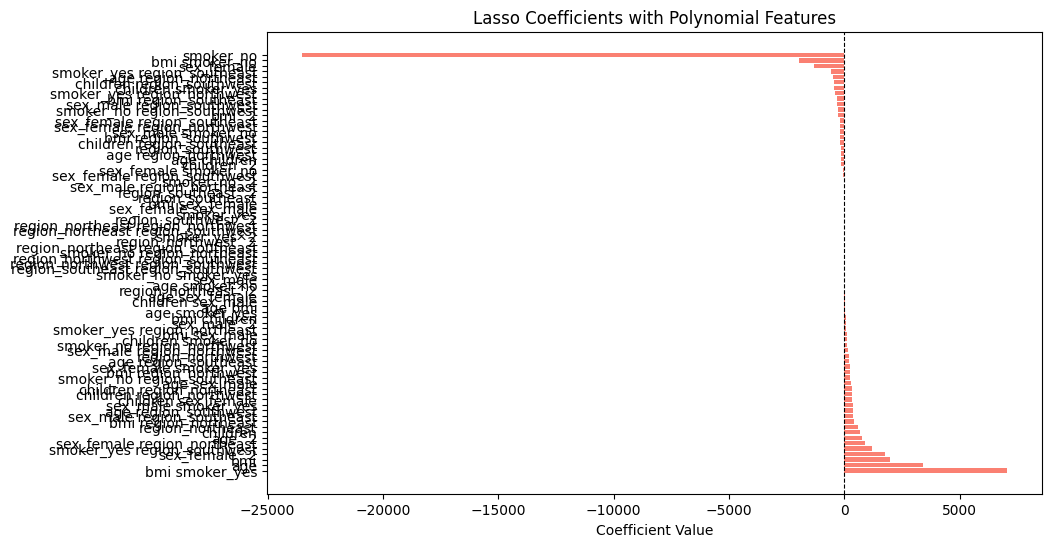

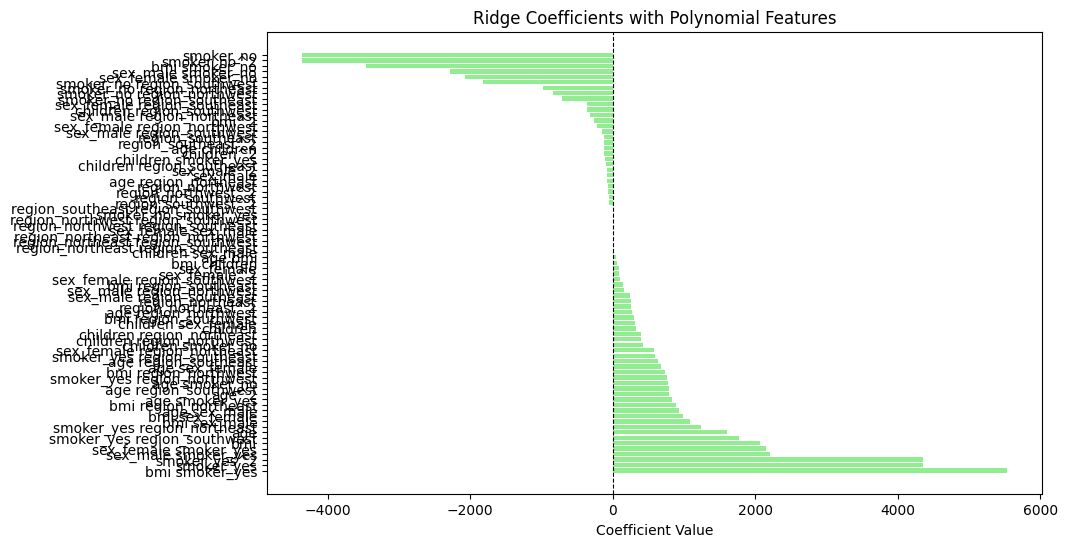

In [46]:
lasso_poly_coefficients = lasso_poly.coef_
lasso_poly_coef_df = pd.DataFrame({'Feature': poly.get_feature_names_out(input_features=X_processed_df.columns),
                                    'Coefficient': lasso_poly_coefficients})
lasso_poly_coef_df = lasso_poly_coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lasso_poly_coef_df['Feature'], lasso_poly_coef_df['Coefficient'], color='salmon')
plt.xlabel('Coefficient Value')
plt.title('Lasso Coefficients with Polynomial Features')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

ridge_poly_coefficients = ridge_poly.coef_
ridge_poly_coef_df = pd.DataFrame({'Feature': poly.get_feature_names_out(input_features=X_processed_df.columns),
                                    'Coefficient': ridge_poly_coefficients})
ridge_poly_coef_df = ridge_poly_coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ridge_poly_coef_df['Feature'], ridge_poly_coef_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.title('Ridge Coefficients with Polynomial Features')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

Report your best model with its evaluated results.

In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge

test_file_path = './InsuranceData_test.csv'
df_test = pd.read_csv(test_file_path)

categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

X_test = df_test
X_test_processed = preprocessor.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_features)


model = lasso_poly
y_test_pred = model.predict(X_test_poly)

submission_df = pd.DataFrame({
    'Predicted Charges': y_test_pred
})

submission_df.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** The distribution of weights in lasso regularization has a much more variance than in ridge regularization, as lasso regularization tends to result in a sparse model, based on the nature of the **l1 loss** it uses. The sparsity of weights in ridge regularization is much less, and features with smaller correlation wouldn't be shrunk down too much. </span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** In both lasso and ridge regularization, increasing α would result in shrinkage of coefficients. However, in lasso regularization the weights tend to shrunk towards zero, and in ridge regularization this does not happen. Increasing α would make the model in lasso regularizationn more explainable, as features with a stronger correlation will have bigger coefficients, and features with a small corelation will have a near zero coefficient. </span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:**
Most importantly, reguralization helps to prevent overfitting, especially in a very large feature space. This is the result of both methods of reguralization help to prevent too much deviation of weights in a linear regression model. It should be noted again that lasso reguralization tends to shrink non-important features' weights to zero, as would dicrease the complexity of having a higher dimension space than usual.
</span>